In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
from random import shuffle
from collections import Counter, defaultdict

In [2]:
snippet_pos = pickle.load(open('snippet_pos.p', 'rb'))

In [3]:
full_feature_samples, semi_feature_samples, bin_feature_samples, baseline_samples, random_samples = pickle.load(open('samples.p', 'rb'))

In [4]:
def create_points_count(samples, do_print=False, is_random=False):
    xaxis = [0]
    yaxis = [0]
    for sample in samples:
        if is_random:
            pid, intent, code, is_annotated = sample
        else:
            _, pid, intent, code, x, is_annotated = sample
        xaxis.append(xaxis[-1] + 1)
        yaxis.append(yaxis[-1] + int(is_annotated))
        if do_print:
            print 'post_id:'
            print pid
            print 'intent:'
            print intent
            print 'code:'
            print code
            print 'features:'
            print x
            print 'confidence:'
            print _[1]
            print '----------------------------\n\n\n'
    return xaxis, yaxis

In [5]:
def create_points_precrec(samples, do_print=False, is_random=False):
    xaxis = [0]
    yaxis = [1]
    total_annotated = 57
    correct = 0
    total_selected = 0
    for sample in samples:
        if is_random:
            pid, intent, code, is_annotated = sample
        else:
            _, pid, intent, code, x, is_annotated = sample
        total_selected += 1
        correct += int(is_annotated)
        xaxis.append(correct/float(total_annotated))
        yaxis.append(correct/float(total_selected))
        if do_print:
            print 'post_id:'
            print pid
            print 'intent:'
            print intent
            print 'code:'
            print code
            print 'features:'
            print x
            print 'confidence:'
            print _[1]
            print '----------------------------\n\n\n'
    return xaxis, yaxis

In [6]:
# create_points = create_points_count
create_points = create_points_precrec

In [7]:
full_feature_x, full_feature_y = create_points(full_feature_samples)

In [8]:
semi_feature_x, semi_feature_y = create_points(semi_feature_samples)

In [9]:
bin_feature_x, bin_feature_y = create_points(bin_feature_samples)

In [10]:
random_x, random_y = create_points(random_samples, is_random=True)

In [11]:
baseline_x, baseline_y = create_points(baseline_samples, is_random=True)

In [12]:
# baseline_mined = [len(baseline_samples)]
# baseline_pos = [sum(1 for pid, intent, code, is_annotated in baseline_samples if is_annotated)]

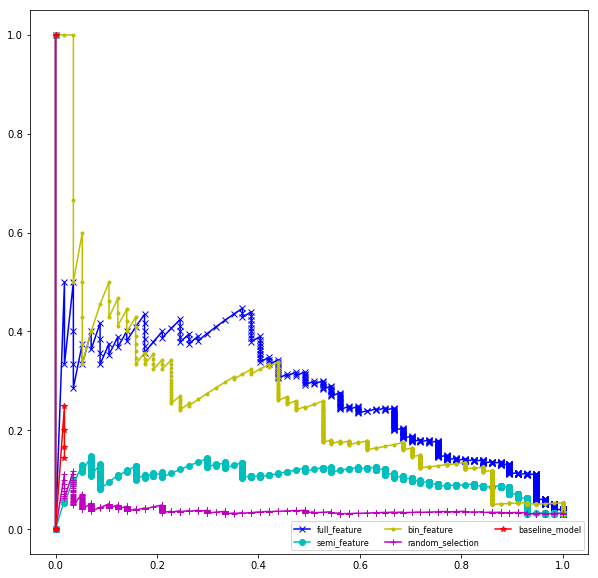

In [13]:
plt.figure(figsize=(10, 10))
ax = plt.subplot()
colors = ['b', 'c', 'y', 'm', 'r']

full_feature, = plt.plot(full_feature_x, full_feature_y, 'x-', color=colors[0])
semi_feature, = plt.plot(semi_feature_x, semi_feature_y, 'o-', color=colors[1])
bin_feature,  = plt.plot(bin_feature_x, bin_feature_y, '.-', color=colors[2])
random_selection,  = plt.plot(random_x, random_y, '+-', color=colors[3])
baseline_model,  = plt.plot(baseline_x, baseline_y, '*-', color=colors[4])


plt.legend((full_feature, semi_feature, bin_feature, random_selection, baseline_model),
          ('full_feature', 'semi_feature', 'bin_feature', 'random_selection', 'baseline_model'),
          scatterpoints=1,
          loc='lower right',
          ncol=3,
          fontsize=8)
#ax.set_xlim([0, 100])
#ax.set_ylim([0, 100])
plt.show()